<h1 style='color:#505E3B;
    text-align:center;
    text-shadow: 2px 2px 4px #606B51;
    font-family:Georgia;
    font-size:50px'>
    Interpolacje
</h1>

<b style='color:#505E3B'>
    Interpolacja
</b>
-  aproksymacja wartości funkcji w jakimś zakresie zmiennych na podstawie części wartości z tego zakresu. Jest to budowanie w danym obszarze tzw. funkcji interpolacyjnej, która przyjmuje w nim z góry zadane wartości w ustalonych punktach nazywanych węzłami.

<h1 style='color:#81AB46;
    text-shadow: 2px 2px 2px #92A66F;
    font-family:Georgia'>
    Import bibliotek
</h1>

In [87]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.signal import argrelextrema
from sklearn.linear_model import Ridge
from numpy.polynomial import Polynomial
from sklearn.preprocessing import PolynomialFeatures
from scipy.interpolate import CubicSpline, CubicHermiteSpline, BSpline
from scipy.interpolate import splrep, splev, interp1d, CubicHermiteSpline
from sklearn.pipeline import make_pipeline
import scipy.interpolate as si

<h1 style='color:#81AB46;
    text-shadow: 2px 2px 2px #92A66F;
    font-family:Georgia'>
    Metody Interpolacji
</h1>

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Interpolacja liniowa
</h3>

Może być wykorzystywana do wypełniania brakujących danych w dużych zbiorach danych, gdzie istnieje liniowa zależność między danymi punktami. Przydatna, jeśli mamy do czynienia z danymi czasowymi lub przestrzennymi, gdzie liniowe przybliżenie jest odpowiednie do analizy trendów. 
<br>Np.: gdy mamy duży zbiór danych dotyczących temperatury w różnych lokalizacjach i czasie, a niektóre dane są brakujące, możemy zastosować interpolację liniową, aby przewidzieć te brakujące wartości. 

In [9]:
def linear_interpolation(x1, y1, x2, y2, x): 
    m = (y2 - y1) / (x2 - x1) 
    c = y1 - m * x1 
    y = m * x + c 
    return y 
x1, y1 = 2, 3  # Pierwszy punkt danych 
x2, y2 = 5, 7  # Drugi punkt danych 
x_interpolated = 4  # Wartość x do interpolacji 
y_interpolated = linear_interpolation(x1, y1, x2, y2, x_interpolated) 
print("Przewidywana wartość y dla x =", x_interpolated, ":", y_interpolated)
#what
#jakieś głupoty
#można użyć np.interp albo scipy.interp1d

Przewidywana wartość y dla x = 4 : 5.666666666666666


<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Interpolacja wielomianowa
</h3>

Użyteczna do przewidywania brakujących danych lub wypełniania luki między znanymi danymi w dużych zbiorach danych. Ta technika pozwala na elastyczne dopasowanie krzywej trendu do danych, co może prowadzić do lepszych prognoz. 
<br>Np.: gdy mamy zbiór danych dotyczących wydatków na reklamę w różnych mediach w ciągu roku, ale brakuje danych dla niektórych miesięcy, możemy użyć interpolacji wielomianowej, aby przewidzieć te brakujące wartości na podstawie dostępnych danych.

Przewidywana wartość y dla x = 3.5 : 5.9453124999999565


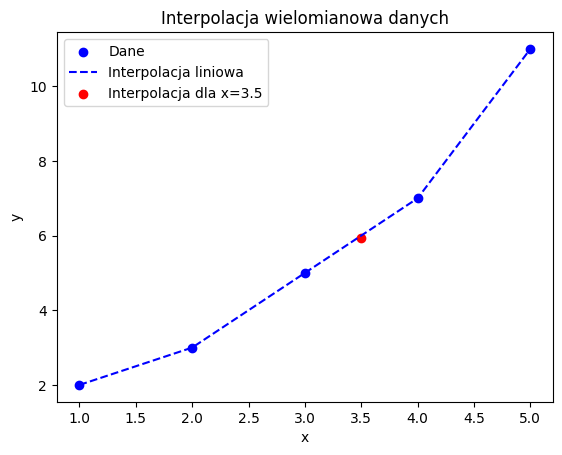

In [12]:
def polynomial_interpolation(x_values, y_values, x): 
    coefficients = np.polyfit(x_values, y_values, len(x_values) - 1) 
    y = np.polyval(coefficients, x) 
    return y 
    
x_values = np.array([1, 2, 3, 4, 5]) 
y_values = np.array([2, 3, 5, 7, 11]) 

x_interpolated = 3.5  # Wartość x do interpolacji 
y_interpolated = polynomial_interpolation(x_values, y_values, x_interpolated) 
print("Przewidywana wartość y dla x =", x_interpolated, ":", y_interpolated) 

plt.scatter(x_values, y_values, color='blue', label='Dane') 
plt.plot(x_values, y_values, color='blue', linestyle='dashed', label='Interpolacja liniowa') 
plt.scatter(x_interpolated, y_interpolated, color='red', label=f'Interpolacja dla x={x_interpolated}') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Interpolacja wielomianowa danych') 
plt.legend() 
plt.show()

#nie rozumiem czemu liniowa

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Interpolacja krzywych sklejanych
</h3>

W przeciwieństwie do interpolacji liniowej i wielomianowej, która używa jednego wielomianu do interpolacji wszystkich punktów danych, interpolacja krzywych sklejanych korzysta z wielu krzywych sklejanych, które są dopasowane do fragmentów danych i łączone w sposób ciągły. Może być wykorzystywana do analizy i wizualizacji dużych zbiorów danych, które zawierają skomplikowane nieliniowe zależności. Jest to szczególnie przydatne, gdy chcemy wykonać analizę trendów lub przewidzieć przyszłe wartości na podstawie dostępnych danych. 
<br>Np.: gdy mamy zbiór danych dotyczących zmiany temperatury w ciągu dnia w różnych lokalizacjach, gdzie temperatura może być nieregularnie mierzona w różnych odstępach czasu, metoda krzywych sklejanych może być użyta do wygładzenia i interpolacji tych danych, aby uzyskać bardziej spójny obraz zmian temperatury w czasie.

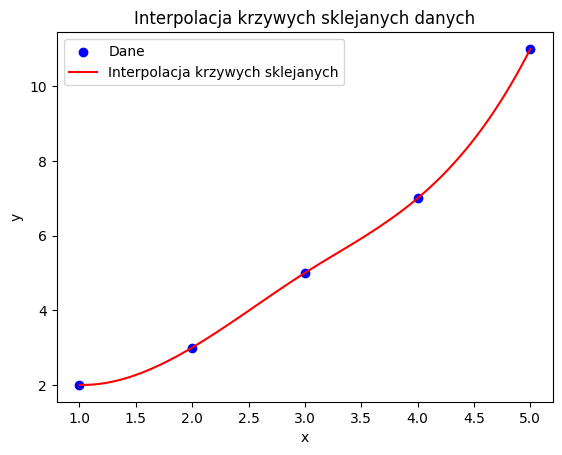

In [14]:
def cubic_spline_interpolation(x_values, y_values, x): 
    spline = CubicSpline(x_values, y_values) 
    y = spline(x) 
    return y 
    
x_values = np.array([1, 2, 3, 4, 5]) 
y_values = np.array([2, 3, 5, 7, 11]) 

x_interpolated = np.linspace(min(x_values), max(x_values), 100) 
y_interpolated = cubic_spline_interpolation(x_values, y_values, x_interpolated) 

plt.scatter(x_values, y_values, color='blue', label='Dane') 
plt.plot(x_interpolated, y_interpolated, color='red', label='Interpolacja krzywych sklejanych') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Interpolacja krzywych sklejanych danych') 
plt.legend() 
plt.show() 

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Interpolacja kubiczna Hermite'a
</h3>

Technika interpolacji danych wykorzystująca wartości funkcji w punktach danych i ich pochodne w tych punktach do dopasowania krzywej interpolacyjnej. Ta metoda pozwala na elastyczne dopasowanie krzywej do danych i uwzględnienie lokalnych zmian w kształcie krzywej. Może być użyteczna do analizy i wizualizacji dużych zbiorów danych, które zawierają lokalne zmiany w kształcie krzywej. Jest to szczególnie przydatne, gdy chcemy analizować lokalne trendy w danych lub przewidywać ich zachowanie w krótkim okresie czasu. 
<br>Np.: gdy mamy zbiór danych dotyczących zmiany ceny akcji na giełdzie w ciągu dnia, gdzie ceny mogą gwałtownie wzrastać lub spadać w krótkim czasie, metoda ta pozwala na dokładniejsze odwzorowanie zmian, uwzględniając pochodne.

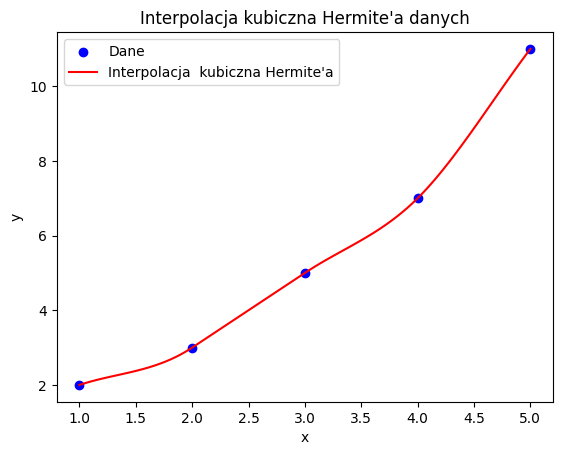

In [22]:
def cubic_hermite_interpolation(x_values, y_values, y_derivatives, x): 
    spline = CubicHermiteSpline(x_values, y_values, y_derivatives) 
    y = spline(x) 
    return y 

x_values = np.array([1, 2, 3, 4, 5]) 
y_values = np.array([2, 3, 5, 7, 11]) 
y_derivatives = np.array([1, 2, 2, 3, 4])  # Przykładowe pochodne pierwszego rzędu 

x_interpolated = np.linspace(min(x_values), max(x_values), 100) 
y_interpolated = cubic_hermite_interpolation(x_values, y_values, y_derivatives, 
x_interpolated)

plt.scatter(x_values, y_values, color='blue', label='Dane') 
plt.plot(x_interpolated, y_interpolated, color='red', label='Interpolacja  kubiczna Hermite\'a') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Interpolacja kubiczna Hermite\'a danych') 
plt.legend() 
plt.show() 

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Interpolacja splajnów B-sklejanych
</h3>

Technika interpolacji, polegająca na łączeniu wielu segmentów funkcji kawałkami wielomianowych w sposób, który zapewnia ciągłość pierwszej i drugiej pochodnej interpolowanej krzywej. Splajn B-sklejany jest ciągiem funkcji wielomianowych stopnia k, gdzie k jest ustalonym stopniem splajnu, które są sklejane w punktach granicznych. Może być użyteczna do analizy i wizualizacji dużych zbiorów danych zawierających skomplikowane nieliniowe zależności. 
<br>Np.: gdy mamy zbiór danych dotyczących zmiany cen nieruchomości w różnych lokalizacjach, gdzie ceny mogą być nieregularnie mierzona w różnych odstępach czasu, metoda ta może być użyta do wygładzenia i interpolacji tych danych, aby uzyskać bardziej spójny obraz zmiany cen w czasie.

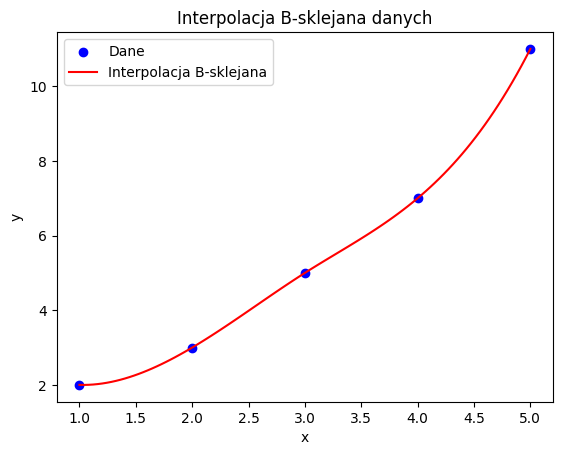

In [21]:
x_values = np.array([1, 2, 3, 4, 5]) 
y_values = np.array([2, 3, 5, 7, 11]) 

tck = splrep(x_values, y_values, k=3)  # k - stopień krzywej B
x_interpolated = np.linspace(min(x_values), max(x_values), 100) 
y_interpolated = splev(x_interpolated, tck) 

plt.scatter(x_values, y_values, color='blue', label='Dane') 
plt.plot(x_interpolated, y_interpolated, color='red', label='Interpolacja B-sklejana') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Interpolacja B-sklejana danych') 
plt.legend() 
plt.show() 

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Interpolacja kawałkami liniowa
</h3>

Polega na podziale zbioru danych na odcinki i interpolowaniu każ
dego odcinka liniowo. Mimo że jest to technika prostsza niż krzywe sklejane czy splajny B
sklejane, może być wystarczająco skuteczna w przypadku prostych danych lub gdy zależy nam na 
szybkości obliczeń.

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Interpolacja metodą najbliższego sąsiada
</h3>

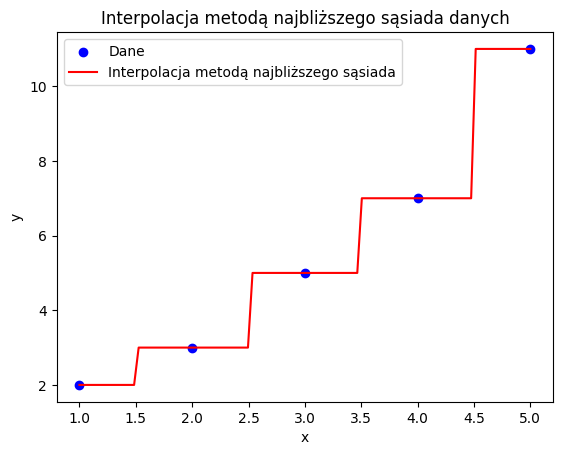

In [166]:
x_values = np.array([1, 2, 3, 4, 5]) 
y_values = np.array([2, 3, 5, 7, 11]) 

interpolator = interp1d(x_values, y_values, kind='nearest') 

x_interpolated = np.linspace(min(x_values), max(x_values), 100) 
y_interpolated = interpolator(x_interpolated)

plt.scatter(x_values, y_values, color='blue', label='Dane') 
plt.plot(x_interpolated, y_interpolated, color='red', label='Interpolacja metodą najbliższego sąsiada') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Interpolacja metodą najbliższego sąsiada danych') 
plt.legend() 
plt.show() 

<h1 style='color:#81AB46;
    text-shadow: 2px 2px 2px #92A66F;
    font-family:Georgia'>
    Zadania
</h1>

1. Prognozowanie temperatury z danymi meteorologicznymi. Przygotuj funkcję do wygenerowania przykładowych danych do pliku weather_data.csv. Wczytaj dane z pliku CSV lub innych źródeł (internetowych). Zidentyfikuj i obsłuż brakujące wartości danych. Wykorzystaj metodę interpolacji splajnów B-sklejanych do prognozowania temperatury na podstawie danych meteorologicznych z różnych stacji pomiarowych.  

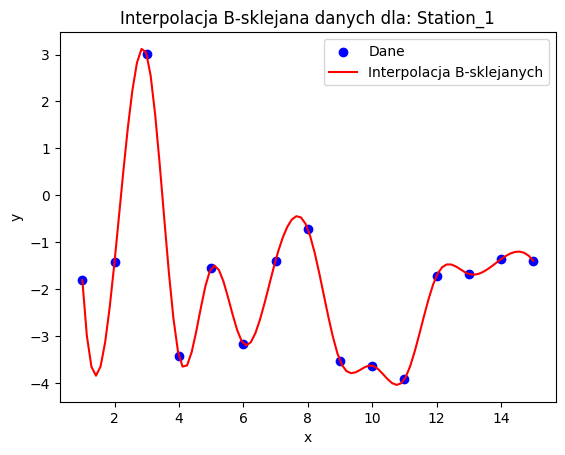

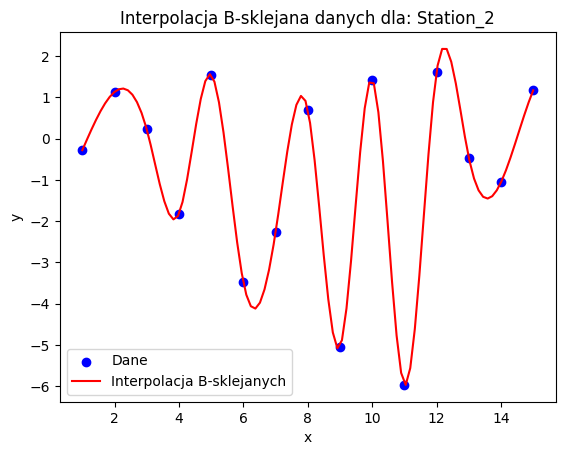

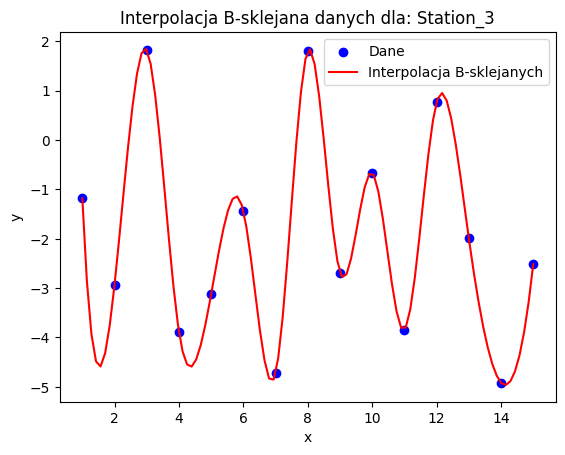

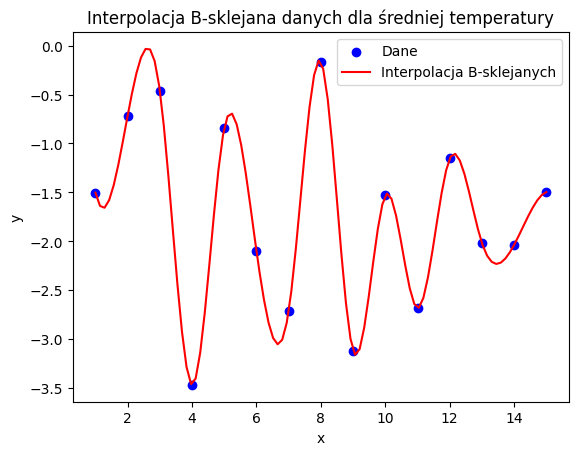

In [30]:
df = pd.read_csv("DaneInterpolacje/weather_data.csv")
X = np.linspace(1,len(df["Station_1"]),len(df["Station_1"]))
X_prog = np.linspace(len(df["Station_1"]),len(df["Station_1"])+20)

for i in df.drop(["Date"], axis=1).columns.to_list():
    y = df[i]
    tck = splrep(X, y, k=3)  # k - stopień krzywej B
    x_interpolated = np.linspace(min(X), max(X), 100) 
    y_interpolated = splev(x_interpolated, tck) 

    plt.scatter(X, y, color='blue', label='Dane') 
    plt.plot(x_interpolated, y_interpolated, color='red', 
             label='Interpolacja B-sklejanych') 
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.title(f'Interpolacja B-sklejana danych dla: {i}') 
    plt.legend() 
    plt.show() 
    if '3' in i:
        break

stat = df.drop(["Date"], axis=1)
y = stat.mean(axis=1)

tck = splrep(X, y, k=3)  # k - stopień krzywej B
x_interpolated = np.linspace(min(X), max(X), 100) 
y_interpolated = splev(x_interpolated, tck) 

plt.scatter(X, y, color='blue', label='Dane') 
plt.plot(x_interpolated, y_interpolated, color='red', 
             label='Interpolacja B-sklejanych') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Interpolacja B-sklejana danych dla średniej temperatury') 
plt.legend() 
plt.show() 

#model = scipy.interpolate.make_interp_spline(X,y,k=3) - do wielowymiarowego y

2. Prognozowanie zużycia energii. Wykorzystaj dane dotyczące zużycia energii do prognozowania przyszłego zużycia energii. Przeprowadź interpolację wielomianową lub inną metodę interpolacji..

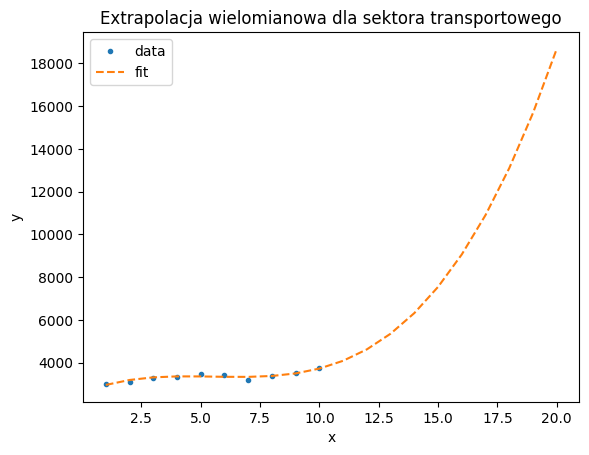

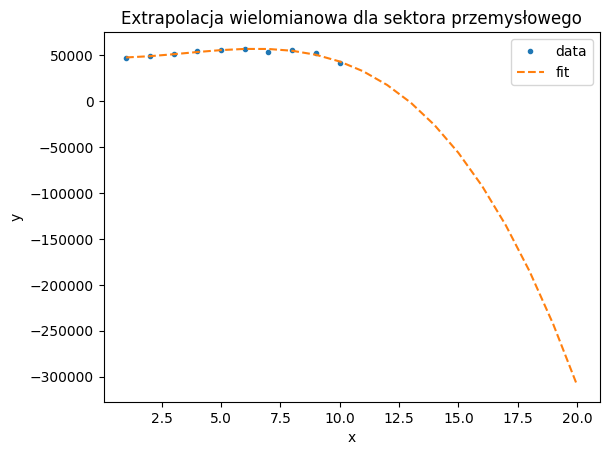

In [52]:
df = pd.read_csv("DaneInterpolacje/industry_sector.csv")
industry = df["OBS_VALUE"]

df = pd.read_csv("DaneInterpolacje/transport_sector.csv")
transport = df["OBS_VALUE"]

x = np.linspace(1, len(transport), len(transport))
x2 = np.linspace(1, len(transport)+10, len(transport)+10)

p = Polynomial.fit(x, transport, 3)

plt.plot(x, transport, ".", label="data")
plt.plot(x2, p(x2), "--", label="fit")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Extrapolacja wielomianowa dla sektora transportowego")
plt.show()

x = np.linspace(1, len(industry), len(industry))
x2 = np.linspace(1, len(industry)+10, len(industry)+10)

p = Polynomial.fit(x, industry, 3)

plt.plot(x, industry, ".", label="data")
plt.plot(x2, p(x2), "--", label="fit")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Extrapolacja wielomianowa dla sektora przemysłowego")
plt.show()

3. Analiza trendów cen akcji. Zastosuj metodę interpolacji kubicznej Hermite'a do analizy trendów cen akcji ze zbioru danych giełdowych. Zidentyfikuj lokalne maksima i minima w cenach akcji oraz przewidywane zmiany trendów.   

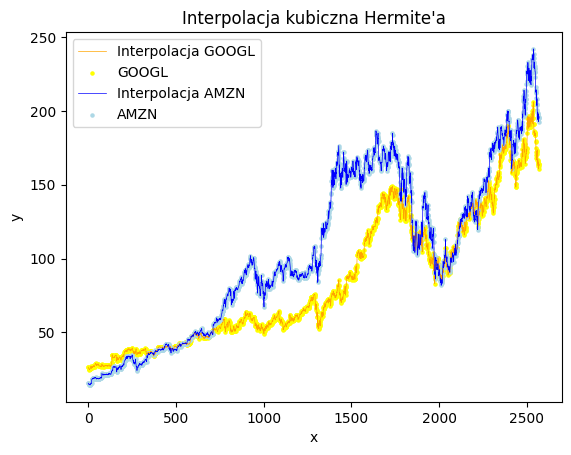

<function matplotlib.pyplot.show(close=None, block=None)>

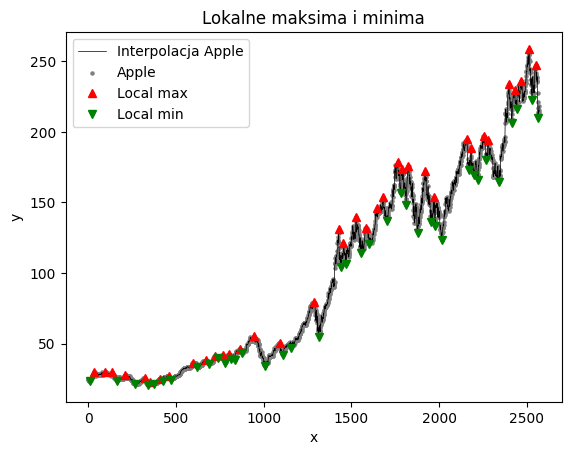

In [120]:
def cubic_hermite_interpolation(X, y, y_der, x): 
    spline = CubicHermiteSpline(X, y, y_der, extrapolate=True) 
    y = spline(x) 
    return y

df = pd.read_csv("DaneInterpolacje/stocks_data.csv")
X = np.arange(len(df['GOOGL']))

# - - - - - Interpolacja kubiczna Hermite'a - - - - - 

colors = ['orange','blue']
y_colors = ['yellow','lightblue']

for idx, col in enumerate(['GOOGL','AMZN']):
    y = df[col]
    y_der = np.gradient(y,X)
    y_interp = cubic_hermite_interpolation(X, y, y_der, X)
    
    plt.plot(X, y_interp, color=colors[idx], label=f'Interpolacja {col}', 
             linewidth=0.5)
    plt.scatter(X, y, color=y_colors[idx], label=col, s=5) 
    
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Interpolacja kubiczna Hermite\'a') 
plt.legend() 
plt.show()

# - - - - - Lokalne maksima i minima - - - - - 
#lokalne maksima i minima to miejsca zmiay trendu, więc trochę nie ogarniam
y = df['AAPL']
y_der = np.gradient(y,X)
y_interp = cubic_hermite_interpolation(X, y, y_der, X)

order = 20 #ile danych po obu stronach porównywać
locmax = argrelextrema(np.array(y), np.greater, order=order)[0]
locmin = argrelextrema(np.array(y), np.less, order=order)[0]
    
plt.plot(X, y_interp, color='black', label='Interpolacja Apple', 
             linewidth=0.5)
plt.scatter(X, y, color='gray', label='Apple', s=5) 
plt.plot(locmax, y.loc[locmax], color='red', marker="^", 
             ls='', label="Local max")
plt.plot(locmin, y.loc[locmin], color='green', marker="v", 
             ls='', label="Local min")
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Lokalne maksima i minima') 
plt.legend() 
plt.show

4. Prognozowanie ruchu ulicznego. Wykorzystaj dane z czujników ruchu ulicznego do prognozowania przyszłego ruchu na drogach. Zastosuj metodę interpolacji do analizy trendów w ruchu ulicznym i przewidywania przyszłych wzorców ruchu. Przeprowadź analizę porównawczą różnych metod interpolacji w kontekście prognozowania.

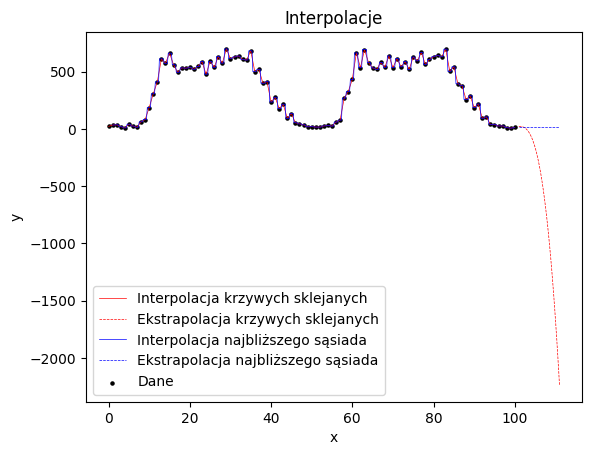

In [171]:
def krzywych_sklejanych(x_values, y_values, x): 
    spline = CubicSpline(x_values, y_values, extrapolate=True, 
                         bc_type='natural') 
    y = spline(x) 
    return y 

def najblizszego_sasiada(x_values, y_values, X):
    interpolator = interp1d(x_values, y_values, kind='nearest', 
                            bounds_error=False, fill_value="extrapolate") 
    return interpolator(X)


df = pd.read_csv("DaneInterpolacje/road_traffic.csv")
y = df['Car'] 
y = y.loc[:100] #patrzymy na wycinek żeby lepiej zobaczyć kształt interpolacji
X = np.arange(len(y))
X_exterp = np.linspace(len(y),len(y)+10,len(y)+10)

# - - - krzywe sklejane - - -
y_interp = krzywych_sklejanych(X,y,X)
plt.plot(X, y_interp, color='red', label='Interpolacja krzywych sklejanych', 
             linewidth=0.5)

y_exterp = krzywych_sklejanych(X,y,X_exterp)
plt.plot(X_exterp, y_exterp, color='red', label='Ekstrapolacja krzywych sklejanych', 
             linewidth=0.5, ls='--')



# - - - najbliższy sąsiad - - -
y_interp = najblizszego_sasiada(X,y, np.linspace(1,100,500))
X = np.linspace(1,100,500)
plt.plot(X, y_interp, color='blue', 
         label='Interpolacja najbliższego sąsiada', linewidth=0.5)

X = np.arange(len(y))
interpolator = interp1d(X, y, kind='nearest', bounds_error=False, 
                        fill_value="extrapolate") 
y_exterp = interpolator(X_exterp)
plt.plot(X_exterp, y_exterp, color='blue', 
         label='Ekstrapolacja najbliższego sąsiada', linewidth=0.5, ls='--')


X = np.arange(len(y))
plt.scatter(X, y, color='black', label="Dane", s=5)     
plt.xlabel('x') 
plt.ylabel('y') 
plt.title('Interpolacje') 
plt.legend() 
plt.show()

No obie są takie średnie imo.

<h1 style='color:#81AB46;
    text-shadow: 2px 2px 2px #92A66F;
    font-family:Georgia'>
    Tipy
</h1>

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Interpolacja biblioteką scipy
</h3>

Chyba każdą (a przynajmniej większość) interpolacji da się zrobić za pomocą funkcji interp1d(x, y, kind='rodzaj interpolacji') ze scipy.interpolate lub innych funkcji ze scipy do interpolacji.

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Lokalne maksima i minima
</h3>

Do znajdowania lokalnych ekstremów można użyć poniższych funkcji.

In [172]:
#argrelextrema(np.array(lista wartości do porównania), 
#np.greater/np.less (max/min), order= liczba wartości po obu stronach do porównania)[0]
#[0] na końcu basically zmienia na listę

#zwraca indeksy ekstremów



#peaks, valleys = find_extremes(ts) 
#print("Lokalne maksima (peaks):", peaks) 
#print("Lokalne minima (valleys):", valleys) 
# Wykres punktów ekstremalnych 
#plt.figure(figsize=(12, 6)) 
#plt.plot(ts) 
#plt.plot(peaks, ts[peaks], "x", label="Lokalne maksima", color='red') 
#plt.plot(valleys, ts[valleys], "x", label="Lokalne minima", color='green') 
#plt.title('Wykrywanie punktów ekstremalnych') 
#plt.xlabel('Czas') 
#plt.ylabel('Wartość') 
#plt.legend() 
#plt.grid(True) 
#plt.show() 

<h3 style='color:#999999;
    text-shadow: 2px 2px 2px #F0F0F0;
    font-family:Georgia'>
    Nie ekstrapolować splajnami
</h3>